# <code>air_store_info </code> Table

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output

import matplotlib.pyplot as plt # for Graphs
import matplotlib.ticker as ticker
plt.style.use('ggplot') # make the pragraph red
import seaborn as sns #


%matplotlib inline

In [21]:
airstore = pd.read_csv('../input/air_store_info.csv')

In [22]:
airstore.head(2)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


In [23]:
airstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


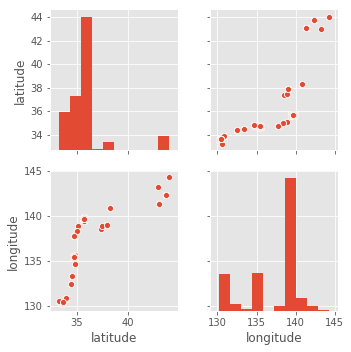

In [24]:
sns.pairplot(airstore)

Text(0, 0.5, 'Number')

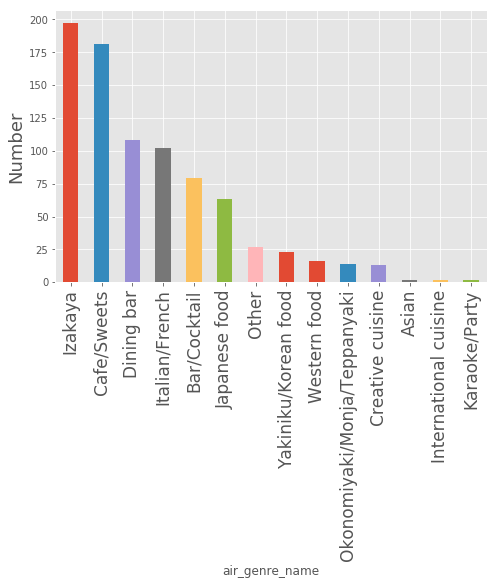

In [40]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(121)
temp = airstore.groupby("air_genre_name").count()['air_store_id'].sort_values(ascending=False)

temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=17)
plt.ylabel("Number",fontsize=18)





  #### conclude about column <code>air_genre_name </code>
  
  <br> **Izakaya** have **197**
  <br> **Cafe/Sweets** have **181**
  <br> **Dining bar** have **108**
  <br> **Italian/French** have **102**
  <br> **Bar/Cocktail** have **79**
  <br> **Japanese food** have **63**
  <br> **Other** have **27**
  <br> **Yakiniku/Korean food** have **23**
  <br> **Western-food** have **16**
  <br> **Okonomiyaki/Monja/Teppanyaki** have **14**
  <br> **Creative-cuisine** have **13**
  <br> **Karaoke/Party** have   **2 <br> International-cuisine** have **2**

In [8]:
display(temp)

air_genre_name
Izakaya                         197
Cafe/Sweets                     181
Dining bar                      108
Italian/French                  102
Bar/Cocktail                     79
Japanese food                    63
Other                            27
Yakiniku/Korean food             23
Western food                     16
Okonomiyaki/Monja/Teppanyaki     14
Creative cuisine                 13
Karaoke/Party                     2
International cuisine             2
Asian                             2
Name: air_store_id, dtype: int64

### column <code>air_area_name</code>

Text(0, 0.5, 'Number')

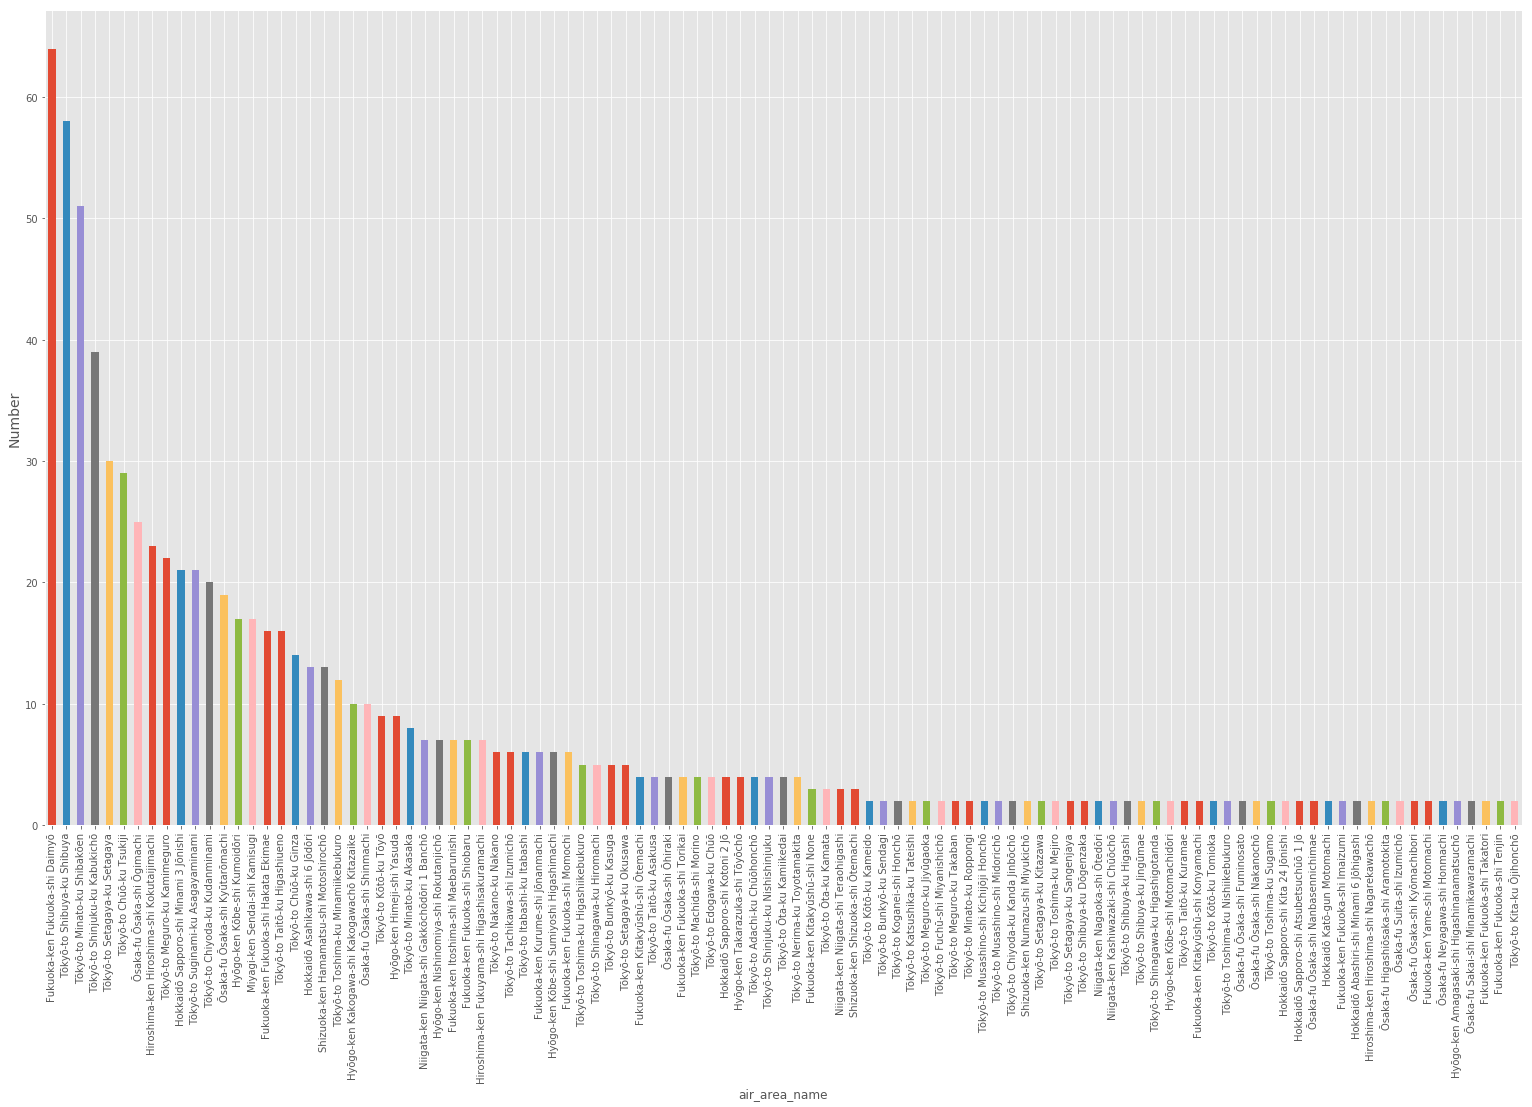

In [64]:
fig2 = plt.figure(figsize=(90,15))

ax2 = fig2.add_subplot(131)
temp2 = airstore.groupby("air_area_name").count()['air_store_id'].sort_values(ascending=False)
temp2.plot(kind='bar',width=0.5,ax=ax2)
ax2.set_xticklabels(temp2.sort_values(ascending=False).index,fontsize=10)
plt.ylabel("Number",fontsize=14)

In [44]:
display(temp2)

air_area_name
Fukuoka-ken Fukuoka-shi Daimyō                   64
Tōkyō-to Shibuya-ku Shibuya                      58
Tōkyō-to Minato-ku Shibakōen                     51
Tōkyō-to Shinjuku-ku Kabukichō                   39
Tōkyō-to Setagaya-ku Setagaya                    30
Tōkyō-to Chūō-ku Tsukiji                         29
Ōsaka-fu Ōsaka-shi Ōgimachi                      25
Hiroshima-ken Hiroshima-shi Kokutaijimachi       23
Tōkyō-to Meguro-ku Kamimeguro                    22
Tōkyō-to Suginami-ku Asagayaminami               21
Hokkaidō Sapporo-shi Minami 3 Jōnishi            21
Tōkyō-to Chiyoda-ku Kudanminami                  20
Ōsaka-fu Ōsaka-shi Kyūtarōmachi                  19
Hyōgo-ken Kōbe-shi Kumoidōri                     17
Miyagi-ken Sendai-shi Kamisugi                   17
Fukuoka-ken Fukuoka-shi Hakata Ekimae            16
Tōkyō-to Taitō-ku Higashiueno                    16
Tōkyō-to Chūō-ku Ginza                           14
Hokkaidō Asahikawa-shi 6 Jōdōri                  1

#### have new columns of <code>region</code>

In [70]:
area_split = airstore['air_area_name'].str.split(' ', expand=True)
airstore['region'] = area_split[0]

In [71]:
#print(len(air_store_info['region'].value_counts()))

Text(0, 0.5, 'Number')

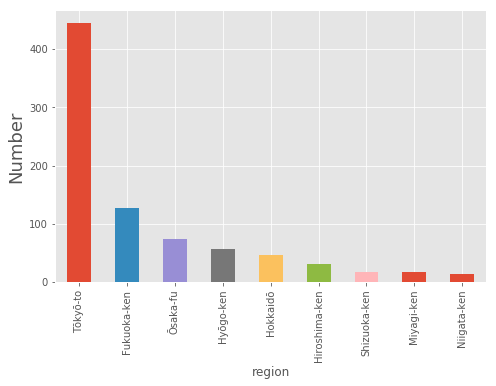

In [78]:
fig3 = plt.figure(figsize=(17,5))

ax3 = fig3.add_subplot(121)
temp3 = airstore.groupby("region").count()['air_store_id'].sort_values(ascending=False)
temp3.plot(kind='bar',width=0.5,ax=ax3)
ax3.set_xticklabels(temp3.sort_values(ascending=False).index,fontsize=10)
plt.ylabel("Number",fontsize=18)

In [73]:
temp3

region
Tōkyō-to         444
Fukuoka-ken      127
Ōsaka-fu          74
Hyōgo-ken         57
Hokkaidō          46
Hiroshima-ken     32
Shizuoka-ken      18
Miyagi-ken        17
Niigata-ken       14
Name: air_store_id, dtype: int64

### Conclusion about the amount of restuarnts in each state\region
Amount of resturants in each state


<table>
<tr><td>Tōkyō-to</td><td>444</td></tr>
<tr><td>Fukuoka-ken</td><td>127</td></tr>
<tr><td>Ōsaka-fu</td><td>74</td></tr>
<tr><td>Hyōgo-ken</td><td>57</td></tr>
<tr><td>Hokkaidō</td><td>46</td></tr>
<tr><td>Hiroshima-ken</td><td>32</td></tr>
<tr><td>Shizuoka-ken</td><td>18</td></tr>
<tr><td>Miyagi-ken</td><td>17</td></tr>
<tr><td>Niigata-ken</td><td>14</td></tr>
</table>

## <code>region</code> per <code>genre_name</code> count <code>value</code>

In [154]:
#'Miyagi-ken'
temp4 = airstore.groupby(['region','air_genre_name']).count()['air_store_id'].sort_values(ascending=False)

display(temp4.index)
display(len(temp4.index.levels[0]))
display(temp4.index.levels[1])
display(temp4.index.names[0])
display(temp4.index.names[1])
display(type(temp4.index.labels))

MultiIndex(levels=[['Fukuoka-ken', 'Hiroshima-ken', 'Hokkaidō', 'Hyōgo-ken', 'Miyagi-ken', 'Niigata-ken', 'Shizuoka-ken', 'Tōkyō-to', 'Ōsaka-fu'], ['Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine', 'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya', 'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki', 'Other', 'Western food', 'Yakiniku/Korean food']],
           labels=[[7, 7, 7, 7, 7, 0, 7, 0, 3, 8, 1, 7, 0, 7, 8, 8, 0, 0, 8, 3, 0, 5, 3, 2, 2, 2, 2, 4, 6, 6, 2, 0, 7, 7, 2, 3, 3, 8, 7, 8, 8, 8, 5, 0, 1, 6, 1, 4, 4, 1, 7, 8, 7, 0, 1, 1, 3, 1, 6, 3, 6, 2, 5, 2, 2, 4, 3, 4], [2, 7, 4, 6, 1, 2, 8, 7, 7, 2, 7, 11, 4, 12, 4, 7, 6, 8, 6, 2, 1, 7, 6, 1, 2, 7, 13, 7, 2, 7, 4, 11, 10, 3, 8, 3, 4, 13, 13, 10, 11, 1, 8, 13, 10, 4, 8, 13, 4, 4, 5, 3, 0, 3, 1, 2, 8, 6, 11, 10, 6, 6, 2, 9, 12, 8, 13, 1]],
           names=['region', 'air_genre_name'])

9

Index(['Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine',
       'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya',
       'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki',
       'Other', 'Western food', 'Yakiniku/Korean food'],
      dtype='object', name='air_genre_name')

'region'

'air_genre_name'

pandas.core.indexes.frozen.FrozenList

C:\Users\gali\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, ' ')

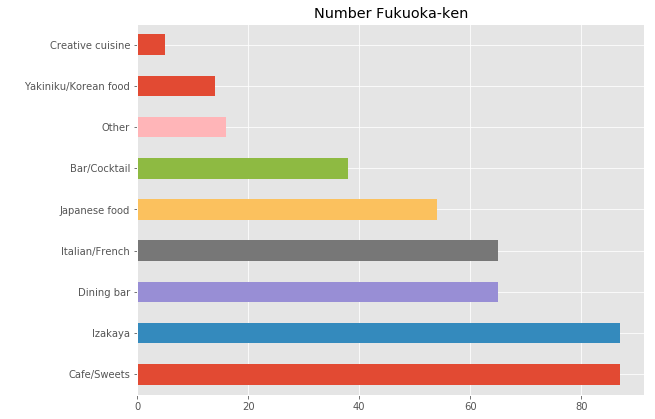

In [248]:
fig = plt.figure(figsize=(15,10))

ax4 = fig.add_subplot(221)
temp4['Tōkyō-to'].\
                plot(kind='barh',
                      width=0.5,
                      ax=ax4,
                      title="Number Tōkyō-to",
                      figsize=(20,15),
                      
                      legend=None)

#ax4.set_xticklabels(temp4['Tōkyō-to'].sort_values(ascending=False),fontsize=12)
plt.ylabel(" ")
#plt.show()
#plt.clf()

ax5 = fig.add_subplot(221)
temp4['Fukuoka-ken'].\
                plot(kind='barh',
                      width=0.5,
                      ax=ax5,
                      title="Number Fukuoka-ken",
                      figsize=(20,15),
                    
                      legend=None)

#ax4.set_xticklabels(temp4['Tōkyō-to'].sort_values(ascending=False),fontsize=12)
plt.ylabel(" ")
#plt.show()

C:\Users\gali\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\gali\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\gali\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDep

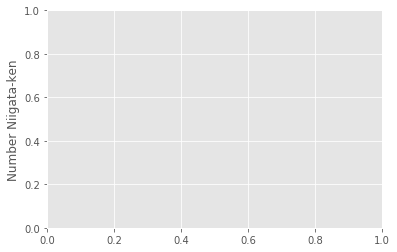

In [236]:
ax5 = fig4.add_subplot(522)
temp4['Fukuoka-ken'].plot(kind='bar',width=0.5,ax=ax5,figsize=(10,5),subplots=True,legend=None)
ax4.set_xticklabels(temp4['Fukuoka-ken'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number",fontsize=18)

ax6 = fig4.add_subplot(523)
temp4['Ōsaka-fu'].plot(kind='bar',width=0.5,ax=ax6)
ax4.set_xticklabels(temp4['Ōsaka-fu'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number",fontsize=12)

ax7 = fig4.add_subplot(524)
temp4['Hyōgo-ken'].plot(kind='bar',width=0.5,ax=ax7)
ax4.set_xticklabels(temp4['Hyōgo-ken'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number Hyōgo-ken",fontsize=18)

ax8 = fig4.add_subplot(525)
temp4['Hokkaidō'].plot(kind='bar',width=0.5,ax=ax8)
ax4.set_xticklabels(temp4['Hokkaidō'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number Hokkaidō",fontsize=12)



ax9 = fig4.add_subplot(526)
temp4['Hiroshima-ken'].plot(kind='bar',width=0.5,ax=ax9)
ax4.set_xticklabels(temp4['Hiroshima-ken'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number Hiroshima-ken",fontsize=12)

ax10 = fig4.add_subplot(527)
temp4['Shizuoka-ken'].plot(kind='bar',width=0.5,ax=ax10)
ax4.set_xticklabels(temp4['Shizuoka-ken'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number Shizuoka-ken",fontsize=12)

ax11 = fig4.add_subplot(528)
temp4['Miyagi-ken'].plot(kind='bar',width=0.5,ax=ax11,figsize=(10,5))
ax4.set_xticklabels(temp4['Miyagi-ken'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number Miyagi-ken",fontsize=12)

ax12 = fig4.add_subplot(529)
temp4['Niigata-ken'].plot(kind='bar',width=0.5,ax=ax12,figsize=(10,5))
ax4.set_xticklabels(temp4['Niigata-ken'].sort_values(ascending=False).index,fontsize=12)
plt.ylabel("Number Niigata-ken",fontsize=12)
temp6 = temp4.copy()
temp6 = temp6.reindex(temp6.index)
#pop

In [118]:
#display(temp4.index[0])
#display(len(temp4.index))



display(temp6['Tōkyō-to'])
print(48+38+54+65+65+87+87)





air_genre_name
Cafe/Sweets                     87
Izakaya                         87
Dining bar                      65
Italian/French                  65
Bar/Cocktail                    54
Japanese food                   38
Other                           16
Western food                    14
Okonomiyaki/Monja/Teppanyaki     5
Creative cuisine                 5
Yakiniku/Korean food             4
International cuisine            2
Asian                            2
Name: air_store_id, dtype: int64

444
